# Розвідковий аналіз даних на основі опитування українських ІТ-спеціалістів влітку 2022 року

Датафрейм містить результати опитування українських ІТ-спеціалістів влітку 2022 року (опитування проводилося на сайті популярної спільноти програмістів https://dou.ua/ )

In [1]:
#  імпортуємо необхідні бібліотеки
%pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 16})

# графіки вбудовуються в блокнот 
%matplotlib inline

# відключити попередження Anaconda
import warnings
warnings.simplefilter('ignore')

# встановимо, що в цислах типу float виводити 2 знаки після роздільника
pd.options.display.float_format = '{:.2f}'.format


### 1. Переглянемо основну інформацію про датафрейм.  

In [2]:
# Зчитуємо в датафрейм df файл з початковими даними
survey = pd.read_csv('portrait_2022.csv')
survey.head()

,Timestamp,Ви працюєте зараз в ІТ?,Work status,Які зміни відбулися у вашій роботі з початком повномасштабної війни в Україні?,Де ви мешкали до початку повномасштабної війни?,Стовпець1,Де живуть зараз - області,Де живуть зараз - країни,Чи переїжджали ви через початок війни?,Ви зараз живете...,...,Ваша настільна операційна система для роботи,Які використовуєте сервіси та інструменти для спільної роботи?,Яка у вас освіта?,Знання англійської мови,Чи приділяєте час самонавчанню?,Ваша стать,Ваш вік,Ваш сімейний стан,Чи є у вас діти?,Які почуття ви найчастіше відчували протягом останнього тижня?
0,5.30.2022 10:19:35,"Так, працюю full-time",Працюють в Україні,Втратив (ла) роботу через початок війни,Київ,Київ чи область,Львів чи область,Україна,"Так, переїхав(ла) в інше місце в Україні","У великому місті (столиця, обласний / регіонал...",...,MacOS,"GitLab, Jira, Slack, Trello","5. Вища (бакалавр, спеціаліст, магістр)",Upper-Intermediate,"Ні, у мене немає на це часу",Чоловік,27.00,Одружений/одружена,Так,"Розпач, Сум, Втому, Надію"
1,5.30.2022 10:19:55,"Так, працюю full-time",Працюють в Україні,Ніяких або майже ніяких,Дніпро,Дніпро чи область,Дніпро чи область,Україна,Ні,"У великому місті (столиця, обласний / регіонал...",...,MacOS,"Confluence, Jira, Microsoft Teams, Slack",1. Середня,Upper-Intermediate,Регулярно відвідую профільні ІТ-події (конфере...,Чоловік,23.00,Маю стосунки,Ні,"Тривогу, Спокій, Оптимізм, Втому"
2,5.30.2022 10:22:01,"Так, працюю full-time",Працюють в Україні,Зменшилася кількість роботи / проєктів,Харків,Харків чи область,Харків чи область,Україна,Ні,"У великому місті (столиця, обласний / регіонал...",...,MacOS,"GitHub, GitLab, Jira, Slack, Zoom","5. Вища (бакалавр, спеціаліст, магістр)",Pre-Intermediate,Регулярно відвідую профільні ІТ-події (конфере...,Чоловік,28.00,Одружений/одружена,Ні,Оптимізм
3,5.30.2022 10:22:25,"Так, працюю full-time",Працюють в Україні,Зменшилася кількість роботи / проєктів,Харків,Харків чи область,Київ чи область,Україна,"Так, переїхав(ла) в інше місце в Україні","У великому місті (столиця, обласний / регіонал...",...,Linux,"Confluence, GitLab, Jira, Slack, Zoom","5. Вища (бакалавр, спеціаліст, магістр)",Intermediate,Читаю професійну літературу,Чоловік,22.00,Вільний(-а),Ні,"Радість, Вину, Тривогу"
4,5.30.2022 10:22:30,"Так, працюю full-time",Працюють в Україні,Збільшилася кількість роботи / проєктів,Київ,Київ чи область,Хмельницький чи область,Україна,"Так, переїхав(ла) в інше місце в Україні",У сільській місцевості,...,MacOS,"Confluence, Google Suite (Docs, Meet, etc), Ji...","5. Вища (бакалавр, спеціаліст, магістр)",Upper-Intermediate,Проходжу онлайн-курси/тренінги,Чоловік,30.00,Співжиття (фактичний шлюб),Ні,"Втому, Радість, Тривогу, Впевненість, Надію, О..."


In [3]:
# виведення основної інформації про датафрейм
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 61 columns):
 #   Column                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                            --------------  -----  
 0   Timestamp                                                                                                                                                         747 non-null    object 
 1   Ви працюєте зараз в ІТ?                                                                                                                                           747 non-null    object 
 2   Work status                                                                                                                   

Бачимо, що велика кількість стовпчиків мають порожні значення, що може негативно вплинути на наше дослідження.

### 2.Видалимо зайві стовпчики. У разі необхідності видалимо: нетипові/помилково введені спостереження; заповнимо/видалимо пропуски в даних.

Для зручності в першу чергу, обєднаємо стовпці з конкретними посадами. Це буде потрібно аби в подальшому проаналізувати посади дата сентистів та дата аналітиків.

In [4]:
# об'єднання стовпців в один. 
survey['Вкажіть вашу спеціалізацію'] = survey['Оберіть вашу посаду3'].fillna('') + survey['Ваша посада'].fillna('') + survey['Оберіть вашу посаду4'].fillna('') + survey['Ваша посада5'].fillna('') + survey['Ваша посада6'].fillna('') + survey['Ваша посада7'].fillna('') + survey['Ваша посада8'].fillna('') + survey['Ваша посада9'].fillna('')

# видалення старих стовпців
survey.drop(["Оберіть вашу посаду3", "Ваша посада","Оберіть вашу посаду4", "Ваша посада5", "Ваша посада6","Ваша посада7", "Ваша посада8", "Ваша посада9",], axis=1, inplace=True)


Наступним кроком видалимо стовбці з великою частиною пустих значень.

In [5]:
# визначення порогу кількості пустих значень
threshold = len(survey) * 0.75

# видалення стовпців з більше, ніж 75% пустих значень
survey.dropna(thresh=threshold, axis=1, inplace=True)

Видалимо непотрібні стовбці:
1. Timestamp 
2. Стовпець1 - не відомо, яка інформація в стовпчику
3. Кількість спеціалістів у вашій компанії (в Україні) 
4. Чи цікава вам поточна робота (проєкт)? 
5. Чи плануєте змінити роботу цього року? 
6. Які почуття ви найчастіше відчували протягом останнього тижня? 
7. Багато ІТ-спеціалістів зараз підтримують фінансово українську армію та волонтерів. Чи можете ви оцінити, який % ваших щомісячих доходів іде на такі ініціативи?  
8. Чи використовуєте ви у своїй роботі мови програмування (одну чи декілька)? (більше 2 тисяч пропущених значень)

In [6]:
# видалимо непотрібні стовбці
survey.drop(["Timestamp","Стовпець1","Кількість спеціалістів у вашій компанії (в Україні)","Чи цікава вам поточна робота (проєкт)?","Чи плануєте змінити роботу цього року?","Які почуття ви найчастіше відчували протягом останнього тижня?","Багато ІТ-спеціалістів зараз підтримують фінансово українську армію та волонтерів. Чи можете ви оцінити, який % ваших щомісячих доходів іде на такі ініціативи? ","Чи використовуєте ви у своїй роботі мови програмування (одну чи декілька)?"], axis=1, inplace=True)

In [7]:
# видалимо усі пропущені рядки
survey.dropna(inplace=True)

# в результаті отримуємо датасет який позбавлений пустих значень, при цьому кількість видалених рядків мінімальне:
survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724 entries, 0 to 745
Data columns (total 30 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Ви працюєте зараз в ІТ?                                                         724 non-null    object 
 1   Work status                                                                     724 non-null    object 
 2   Які зміни відбулися у вашій роботі з початком повномасштабної війни в Україні?  724 non-null    object 
 3   Де ви мешкали до початку повномасштабної війни?                                 724 non-null    object 
 4   Де живуть зараз - області                                                       724 non-null    object 
 5   Де живуть зараз - країни                                                        724 non-null    object 
 6   Чи переїжджали ви 

### 3. Спробуємо проаналізувати як змінилося життя українських ІТ-спеціалістів з початком повномасштабної війни в Україні.

Для аналізу цього питання я обрав наступні показники: 
1. Які зміни відбулися у вашій роботі з початком повномасштабної війни в Україні?
2. Чи переїжджали ви через початок війни?
3. Чи змінилася ваша зарплата через початок війни?
4. Як змінилась ваша продуктивність після початку повносмаштабної війни?
5. Де ви мешкали до початку повномасштабної війни?
6. Де живуть зараз - області

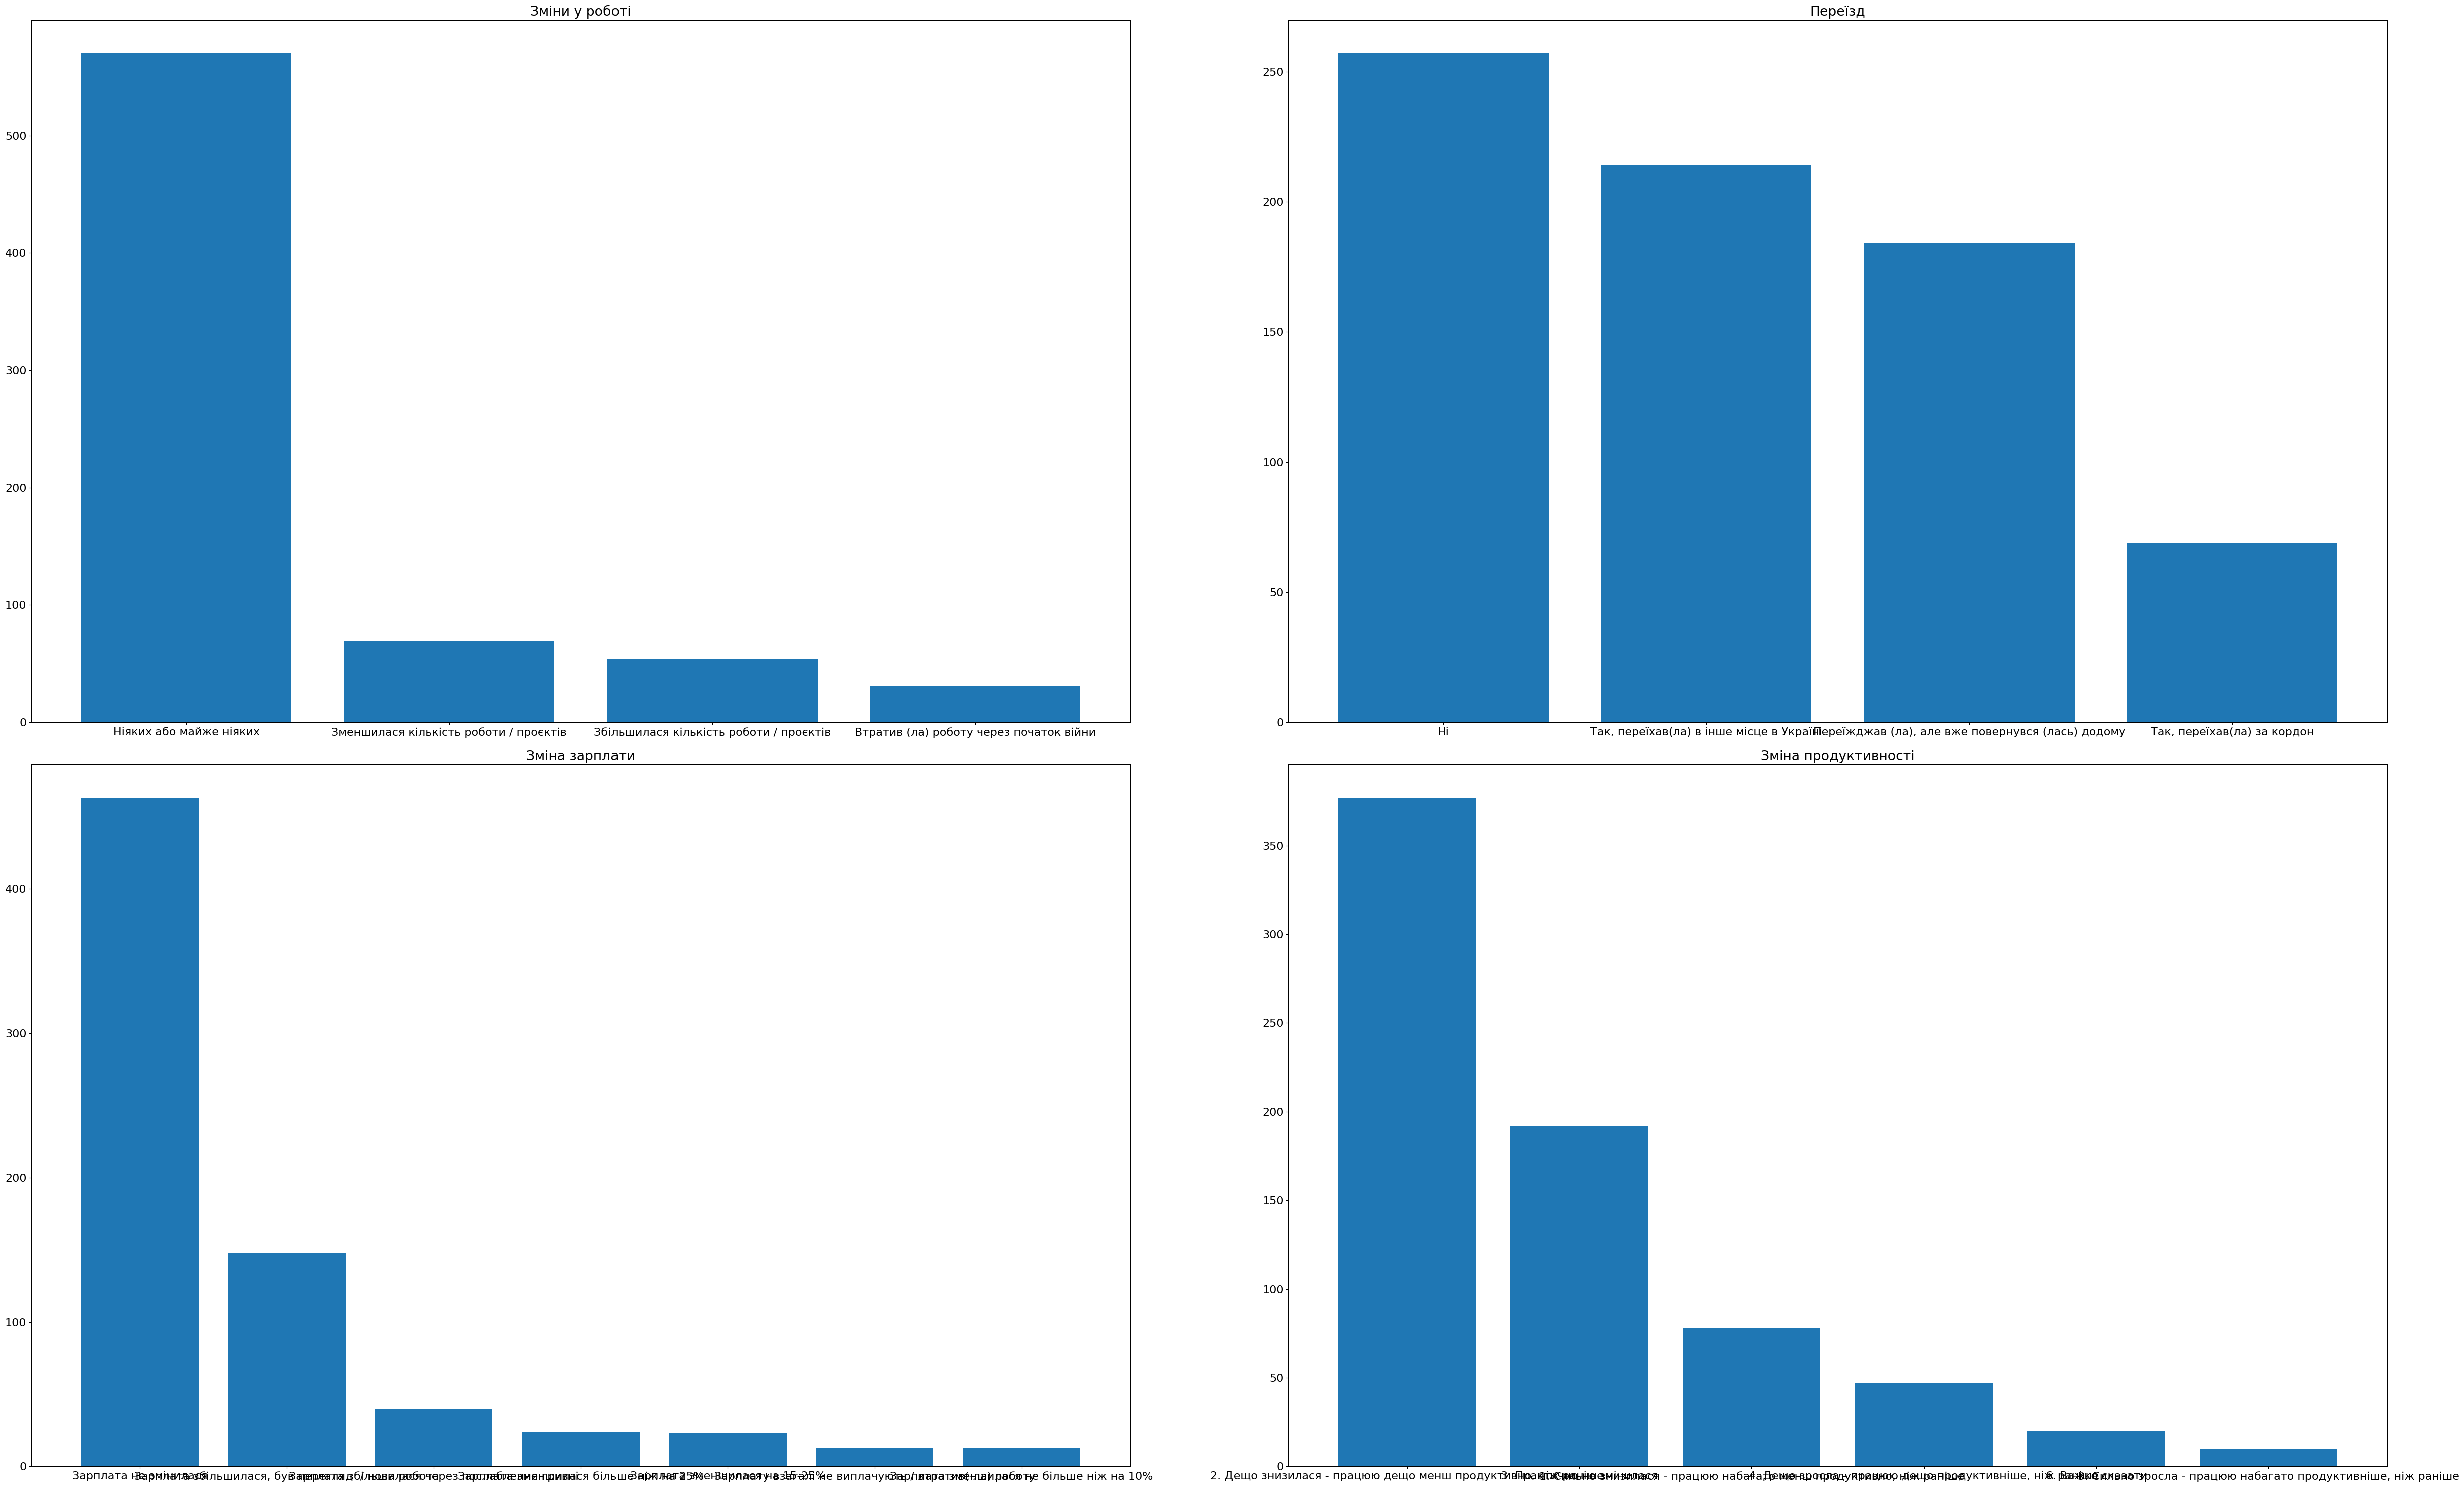

In [8]:
# Проаналізуємо перші 4 стовпчика. 
# отримуємо кількість відповідей на кожне питання
changes_count = survey['Які зміни відбулися у вашій роботі з початком повномасштабної війни в Україні?'].value_counts()
relocation_count = survey['Чи переїжджали ви через початок війни?'].value_counts()
salary_change_count = survey['Чи змінилася ваша зарплата через початок війни?'].value_counts()
productivity_change_count = survey['Як змінилась ваша продуктивність після початку повносмаштабної війни? '].value_counts()

# візуалізація даних
fig, axs = plt.subplots(2, 2, figsize=(50, 30))
axs[0, 0].bar(changes_count.index, changes_count.values)
axs[0, 0].set_title('Зміни у роботі')
axs[0, 1].bar(relocation_count.index, relocation_count.values)
axs[0, 1].set_title('Переїзд')
axs[1, 0].bar(salary_change_count.index, salary_change_count.values)
axs[1, 0].set_title('Зміна зарплати')
axs[1, 1].bar(productivity_change_count.index, productivity_change_count.values)
axs[1, 1].set_title('Зміна продуктивності')
plt.tight_layout()
plt.show()



Отже, як бачимо зазвичай ніяких змін, безпосередньо у роботі не з'явилось. Здебільшого спеціалісти не змінювали локацію, однак велика частка переїхала в іншу область. Війна не вплинула на зарплату ІТ-фахівців, однак їхня ефективність дещо знизилась.

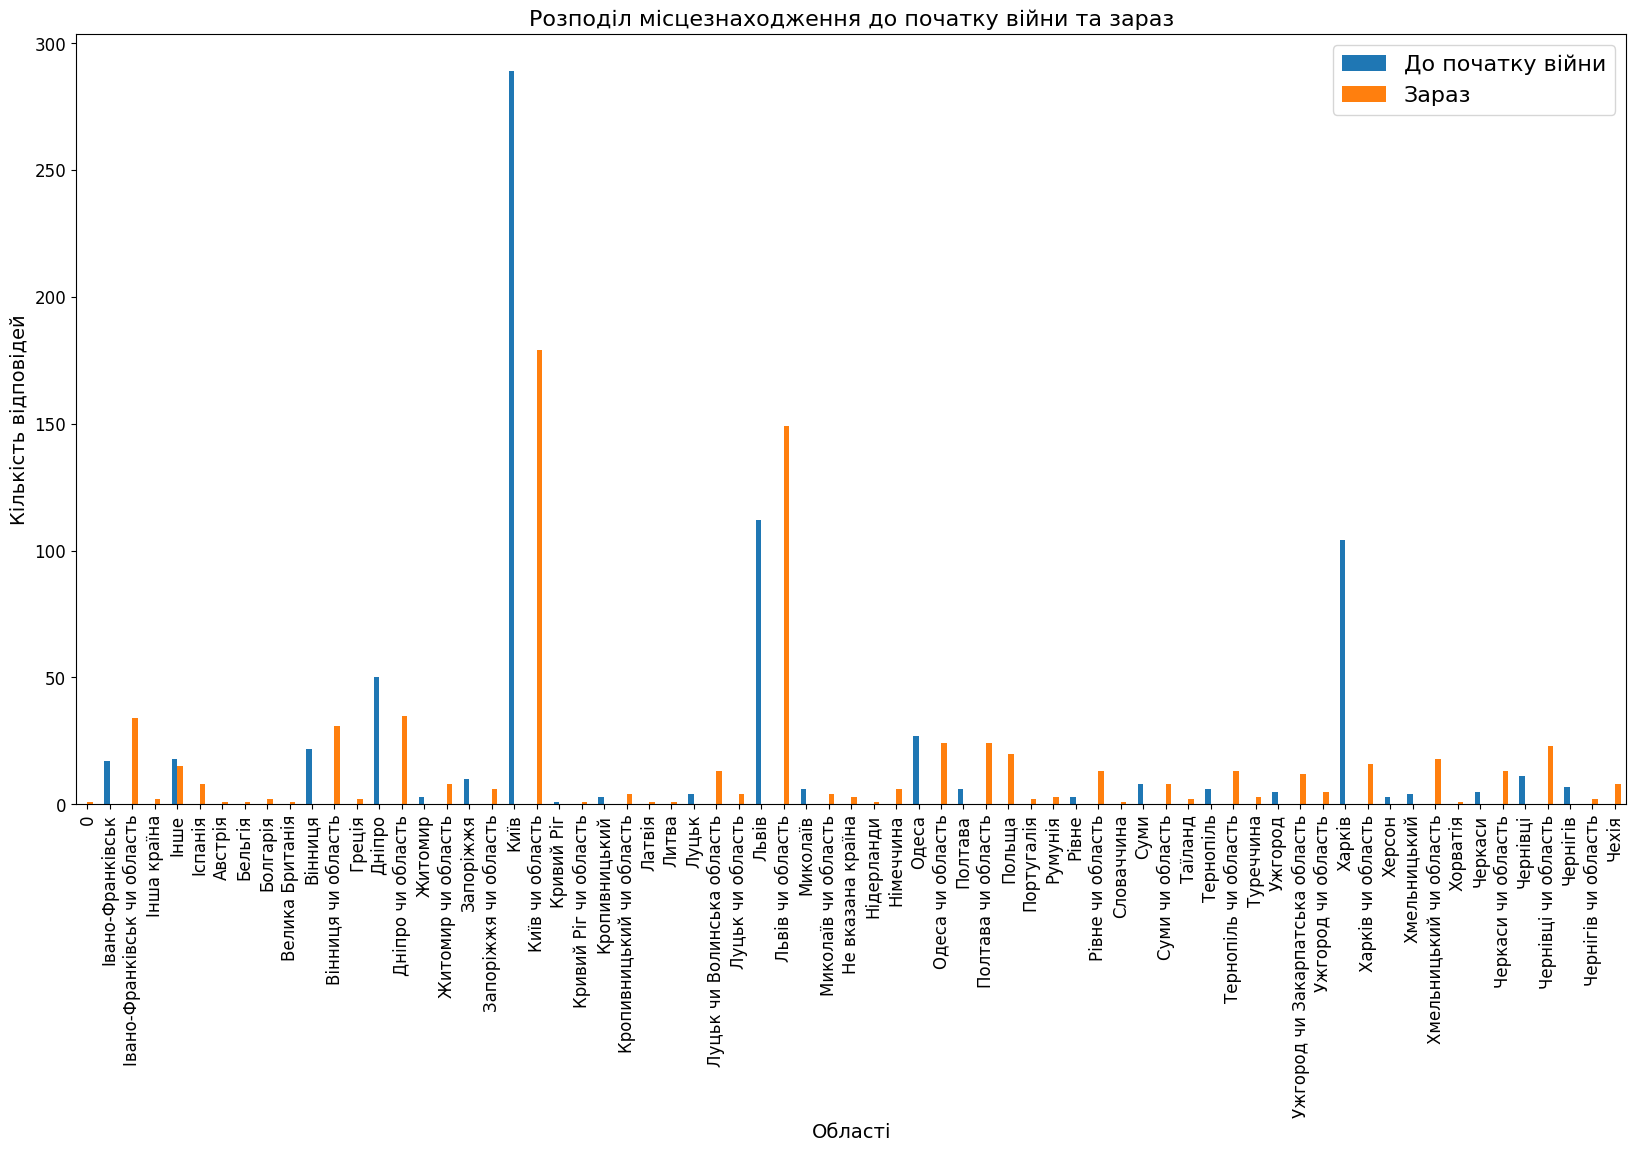

In [9]:
# далі проаналізуємо, як змінилось розташування спеціалістів:

# відфільтруємо записи, де вказано місцезнаходження до початку війни
before_war = survey['Де ви мешкали до початку повномасштабної війни?'].dropna()

# відфільтруємо записи, де вказано поточне місцезнаходження
now = survey['Де живуть зараз - області'].dropna()

# підрахуємо кількість відповідей для кожної області
before_counts = before_war.value_counts()
now_counts = now.value_counts()

# об'єднаємо дані в один датафрейм
df_counts = pd.DataFrame({
    'До початку війни': before_counts,
    'Зараз': now_counts
})

# створимо стовпчикову діаграму зі зведеними даними
ax = df_counts.plot(kind='bar', figsize=(20, 10), fontsize=12)

# налаштуємо заголовки та мітки осей
ax.set_title('Розподіл місцезнаходження до початку війни та зараз', fontsize=16)
ax.set_xlabel('Області', fontsize=14)
ax.set_ylabel('Кількість відповідей', fontsize=14)

# показати графік
plt.show()

Отже, перше на що звертається увага, це кількість працівників, які виїхала з Києва та Харкова: 2200 та 1800 відповідно. Бачимо, що також втратили спеціалістів Одеса та Дніпро. В цей час, кількість спеціалістів у Львові, Івано-Франківську та Вінниці значно виросли. Серед іноземних країн, найбільше фахівців переїхали в Польщу. 

### 4. Як можна охарактеризувати "типового ІТ-спеціаліста" в Україні у 2022 році?

Для характеристики "типового ІТ-спеціаліста" я обрав такі групи критеріїв:
1. Локація - Де живуть зараз - області, Ви зараз живете...
2. В якій компанії та скільки працює -  Тип компанії, Скільки годин на тиждень працюєте?
3. Освітній рівень -  Яка у вас освіта?, Знання англійської мови
4. Особисті характеристики -  Ваша стать,Ваш вік, Ваш сімейний стан


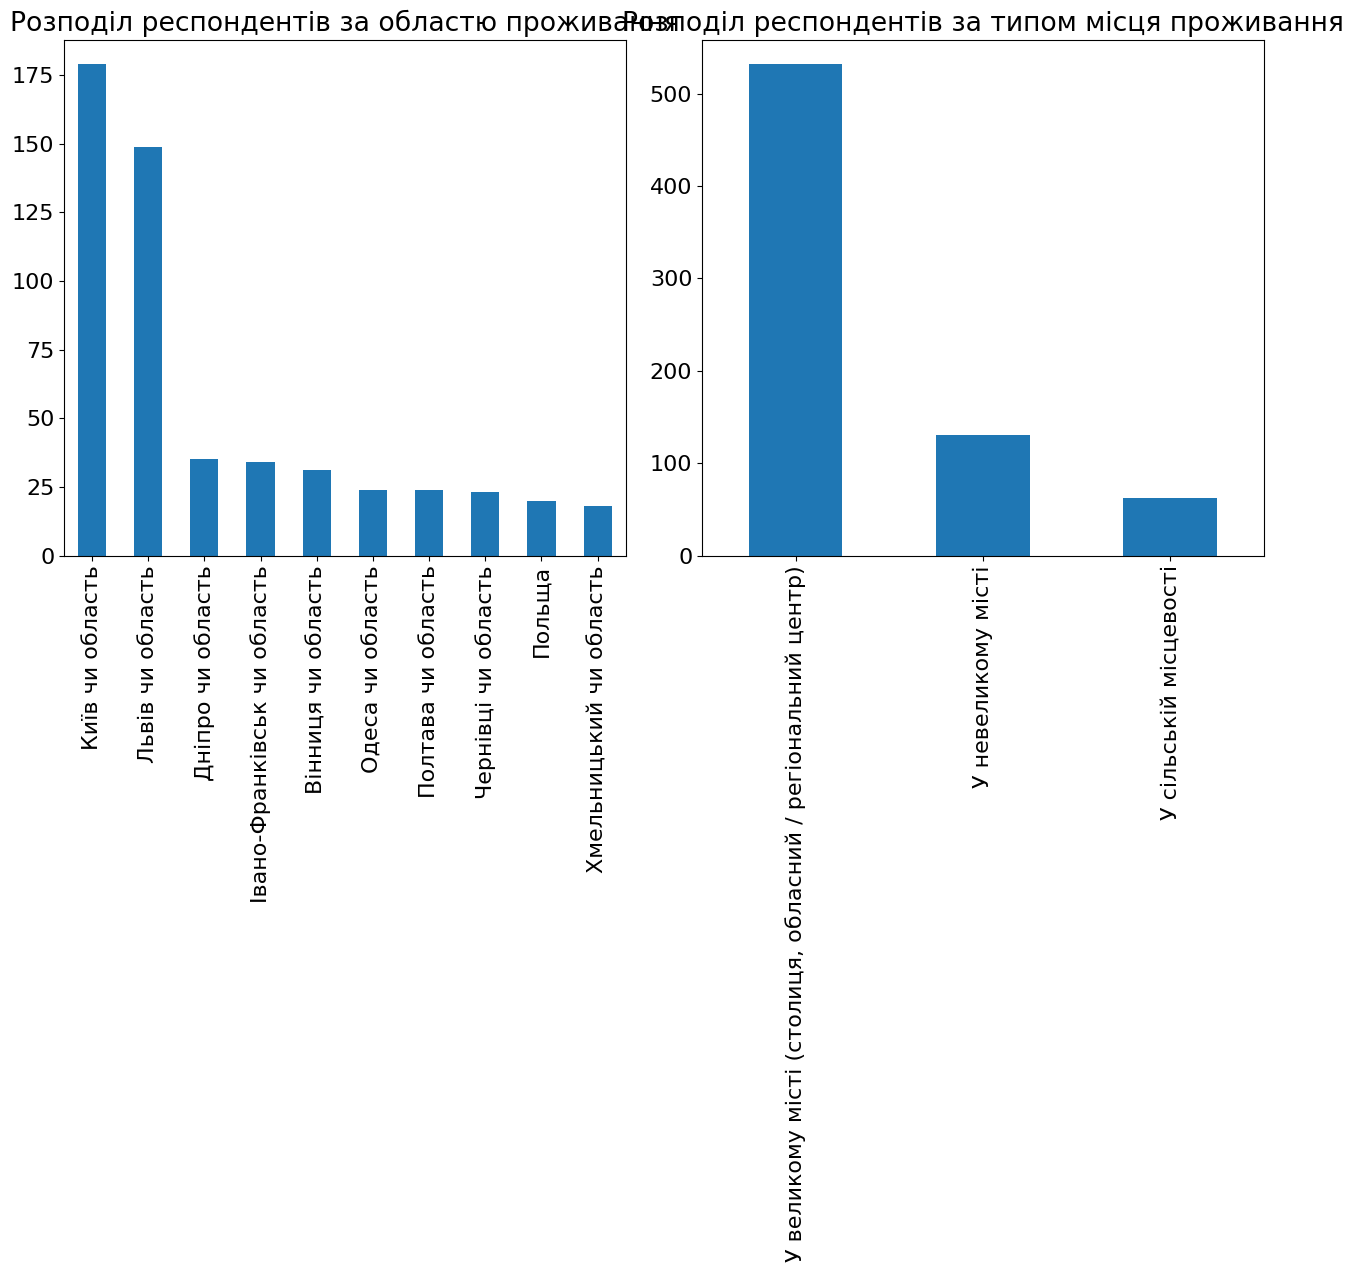

In [10]:
# Розпочнімо аналіз з місця розташування "типового ІТ-спеціаліста" в Україні у 2022 році.
# Відбір даних для візуалізації
region_counts = survey['Де живуть зараз - області'].value_counts().nlargest(10)
location_counts = survey['Ви зараз живете...'].value_counts()

# Візуалізація
fig, ax = plt.subplots(1, 2, figsize=(13, 13))

# Діаграма для стовпчика "Де живуть зараз - області"
region_counts.plot(kind='bar', ax=ax[0])
ax[0].set_title('Розподіл респондентів за областю проживання')

# Діаграма для стовпчика "Сільська місцевість чи місто"
location_counts.plot(kind='bar', ax=ax[1])
ax[1].set_title('Розподіл респондентів за типом місця проживання')

plt.tight_layout()
plt.show()

Як ми дізнались з минулого питання, більшість спеціалістів залишились або повернулись в Україну, тому можна стверджувати, що з точки зору локації "типовий ІТ-спеціаліст" знаходиться у великому місті, а саме у Києві або Львові.

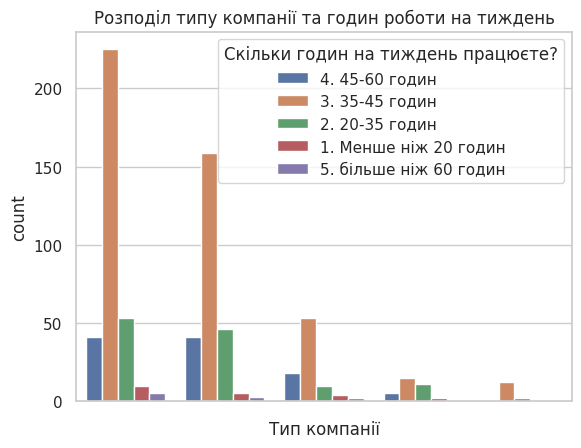

In [11]:
# з'ясуємо в якій компанії та скільки працює "типовий ІТ-спеціаліста" в Україні у 2022 році.

sns.set(style="whitegrid")

ax = sns.countplot(x="Тип компанії", hue="Скільки годин на тиждень працюєте?", data=survey, order = survey['Тип компанії'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Розподіл типу компанії та годин роботи на тиждень')
plt.show()

Бачимо що аутсорсингова та продуктова компанії мають найбільше айті працівників. Найчастіше працюють від 35-45 годин на тиждень.

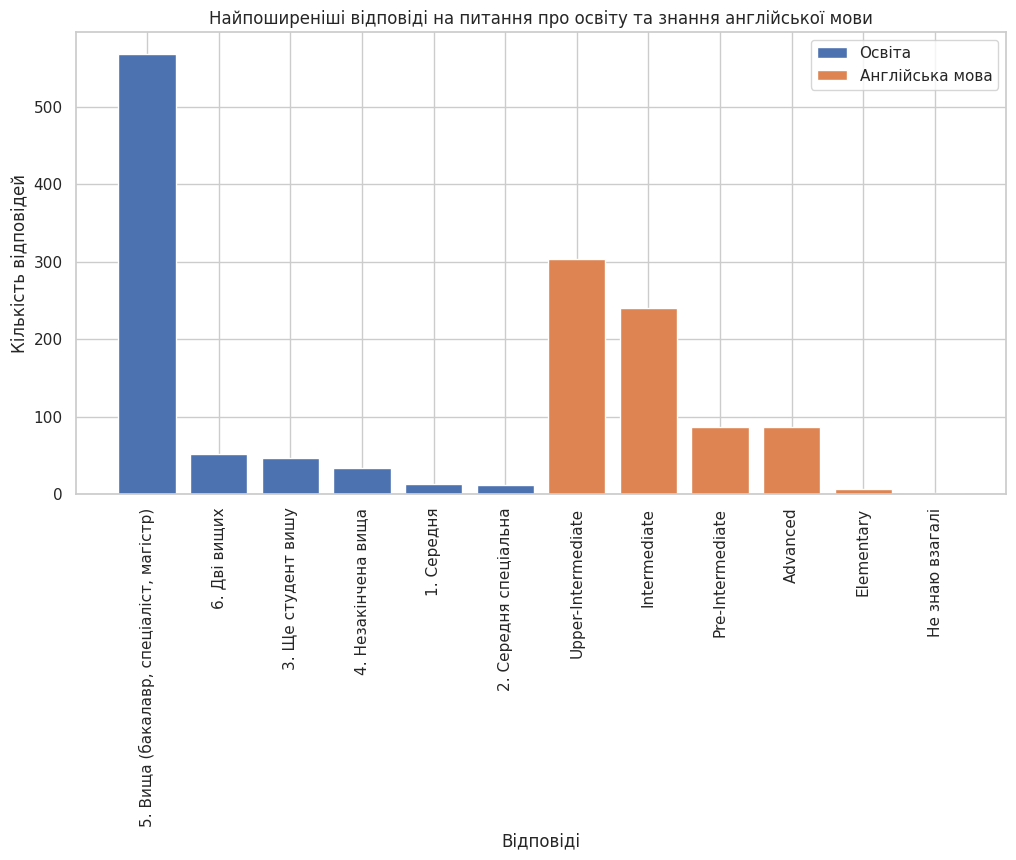

In [12]:
# проаналізуємо рівень освіти "типового ІТ-спеціаліста" в Україні у 2022 році.
# Дані для візуалізації
edu_counts = survey['Яка у вас освіта?'].value_counts().head(10)
lang_counts = survey['Знання англійської мови'].value_counts()

# Створення графіку
fig, ax = plt.subplots(figsize=(12, 6))

# Додавання стовпчиків 
ax.bar(edu_counts.index, edu_counts.values, label='Освіта')
ax.bar(lang_counts.index, lang_counts.values, label='Англійська мова')

# Налаштування осей та заголовку графіку
ax.set_xlabel('Відповіді')
ax.set_ylabel('Кількість відповідей')
ax.set_title('Найпоширеніші відповіді на питання про освіту та знання англійської мови')
ax.legend()
plt.xticks(rotation=90)

# Відображення графіку
plt.show()

Бачимо що переважна кількість спеціалістів мають одну вищу освіту та рівень англіської на рівні upper-intermediate.

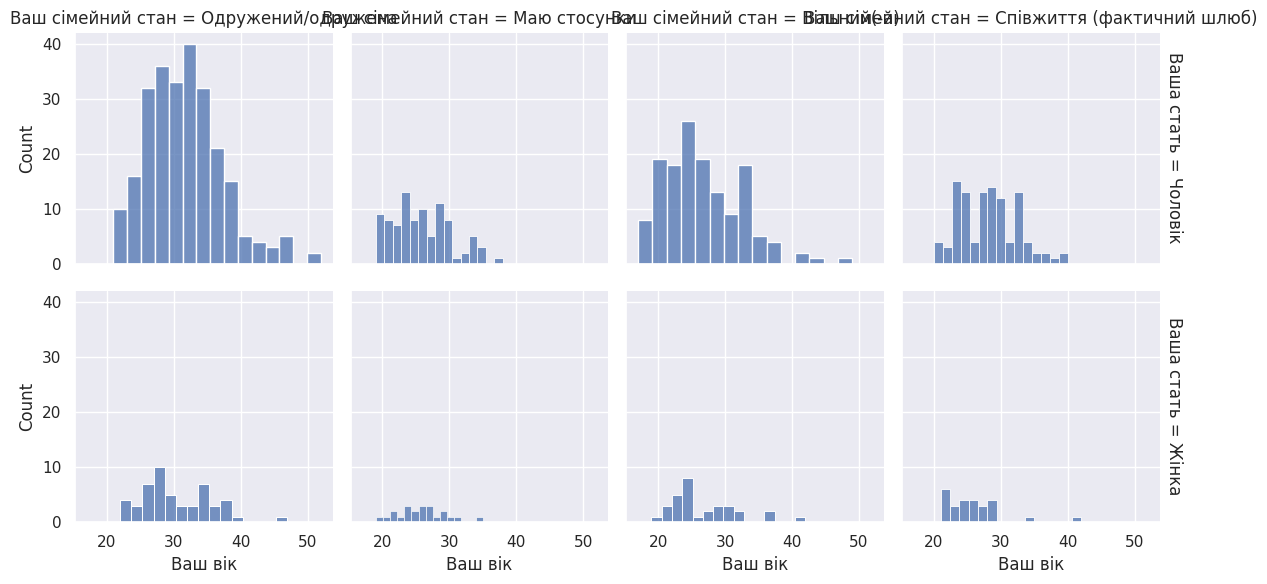

In [13]:
# дізнаємось особисті характеристики "типового ІТ-спеціаліста" в Україні у 2022 році.
# Налаштування параметрів графіку
sns.set(style="darkgrid", )
g = sns.FacetGrid(survey, row="Ваша стать", col="Ваш сімейний стан", margin_titles=True)
g.map(sns.histplot, "Ваш вік", bins=15)

# Показати графік
plt.show()

Як бачимо, переважна кількість спеціалістів - чоловіки. Зазвичай вони одружені та віком від 30 до 35 років.


Підбиваючи підсумки "типовий ІТ-спеціаліст" в Україні у 2022 році це одружений чоловік віком від 30 до 35 років. Він має одну вищу освіту та рівень англійської на рівні upper-intermediate. Він працює у аутсорсинговій або продуктовій компанії у великих містах, таких як Київ або Львів.

### 5. Як ІТ-спеціалісти оцінюють свій поточний рівень фінансового забезпечення?

Для цього пункту я обрав наступні стовбці для аналізу:
1.  Чи задоволені ви зарплатою?
2.  Чи маєте інші джерела доходу, окрім зарплати?
3.  Яке ваше фінансове становище?
4.  Чи оплачує компанія овертайми? 



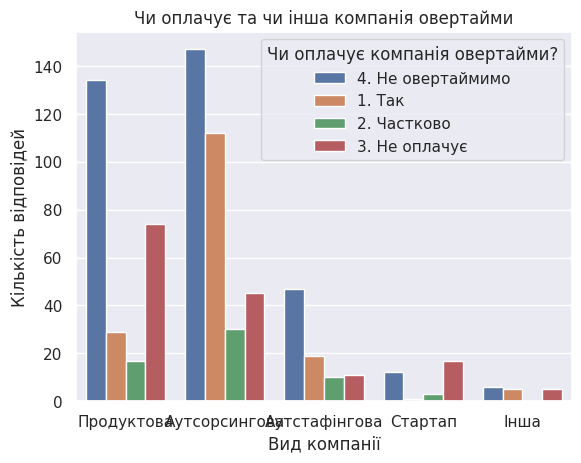

In [14]:
# Проаналізуємо чи оплачують компанії працівникам овертайми, безпосередньо, у розрізі типу компаній.

# створюємо новий датафрейм з двома необхідними стовбцями
df_salary_finance = survey[['Тип компанії', 'Чи оплачує компанія овертайми?']]

# використовуємо countplot для побудови графіку
sns.countplot(data=df_salary_finance, x='Тип компанії', hue='Чи оплачує компанія овертайми?')

# додаємо назву графіку та мітки на осі
plt.title('Чи оплачує та чи інша компанія овертайми')
plt.xlabel('Вид компанії')
plt.ylabel('Кількість відповідей')
plt.show()

Як бачимо, найчастіше працівники не овертаймлять, однак найчастіше їх оплачують аутсорсингові компанії, а той час, як найрідше - продуктові. 

In [15]:
#спробуємо дізнатись чи залежить фінансове становище від стажу та віку
survey.groupby('Яке ваше фінансове становище?')['Загальний стаж роботи в ІТ',"Ваш вік"].mean()

,Загальний стаж роботи в ІТ,Ваш вік
Яке ваше фінансове становище?,,
"Негативне, витрачаю більше, ніж заробляю",4.09,30.67
"Нульове, витрачаю стільки, скільки заробляю",4.64,29.78
"Позитивне, витрачаю менше, ніж заробляю",5.58,28.45


Як бачимо, стаж дійсно впливає на фінансова становище і чим він вище тим краще, в той час як вік ролі не грає. Тому спробуємо дізнатись, яке середнє значення загального стажу роботи в ІТ серед усі працівників:

In [16]:
average_experience = survey['Загальний стаж роботи в ІТ'].mean()
print("Середнє значення Загальний стаж роботи в ІТ: ", average_experience)

Середнє значення Загальний стаж роботи в ІТ:  5.324930939226519


Так як значення наближається до 5,95, можемо стверджувати, що, зазвичай, фінансове становище в ІТ-працівників - позитивне. 

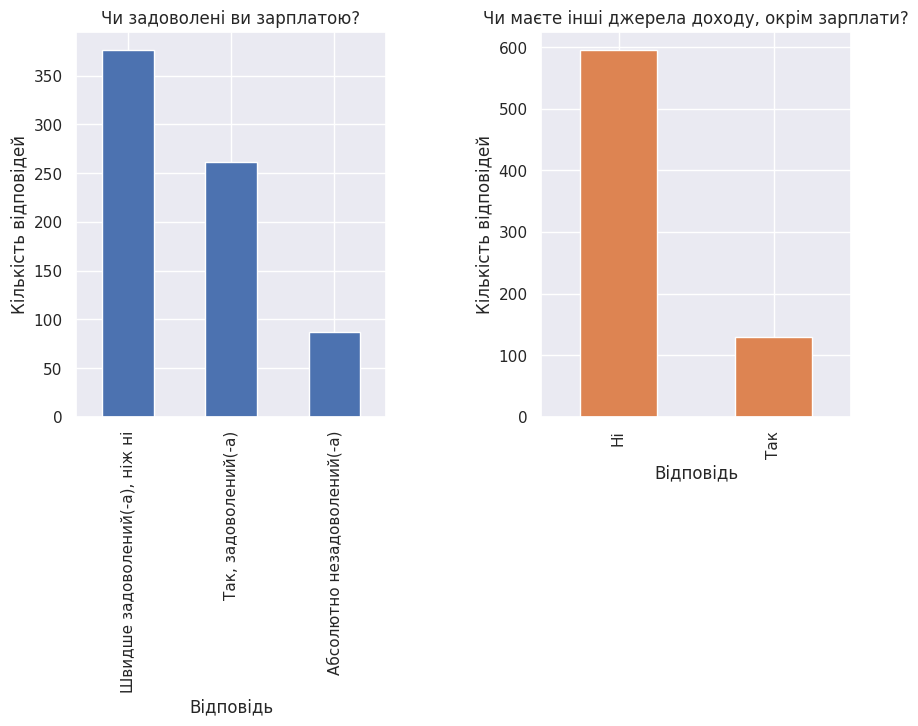

In [17]:
# проаналізуємо два основних показника.

# вибірка потрібних стовбців
df_subset = survey[['Чи задоволені ви зарплатою?', 'Чи маєте інші джерела доходу, окрім зарплати?']]

# підрахунок кількості відповідей на кожне питання
q1_count = df_subset['Чи задоволені ви зарплатою?'].value_counts()
q2_count = df_subset['Чи маєте інші джерела доходу, окрім зарплати?'].value_counts()

# налаштування графіку
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
plt.subplots_adjust(wspace=0.5)

# побудова першого бар чарту
q1_count.plot(kind='bar', ax=ax1, color='C0')
ax1.set_title('Чи задоволені ви зарплатою?')
ax1.set_xlabel('Відповідь')
ax1.set_ylabel('Кількість відповідей')

# побудова другого бар чарту
q2_count[:10].plot(kind='bar', ax=ax2, color='C1')
ax2.set_title('Чи маєте інші джерела доходу, окрім зарплати?')
ax2.set_xlabel('Відповідь')
ax2.set_ylabel('Кількість відповідей')

plt.show()


Більша частина стверджує що швидше задоволена або задоволена заробітною платою. І враховуючи той факт, що при цьому інших джерел доходу у респондентів немає - зарплати у них дійно високі. Спираючись на ці графіки, можемо стверджувати що спеціалісти досить позитивно оцінюють своє фінансове становище. 

### 6. Детально охаратеризуйте освітній рівень та професійні навички дата саентистів та дата аналітиків.

Для характеристики освітнього рівня та професійних навичок дата саентистів та дата аналітиків я обрав наступні стовпчики: 

1. Чи приділяєте час самонавчанню?
2. Знання англійської мов
3. Яка у вас освіта? 
4. В якій сфері проєкт, в якому ви зараз працюєте?
5. Ваш тайтл
6. Вкажіть вашу спеціалізацію
7. Чи задоволені ви зарплатою?

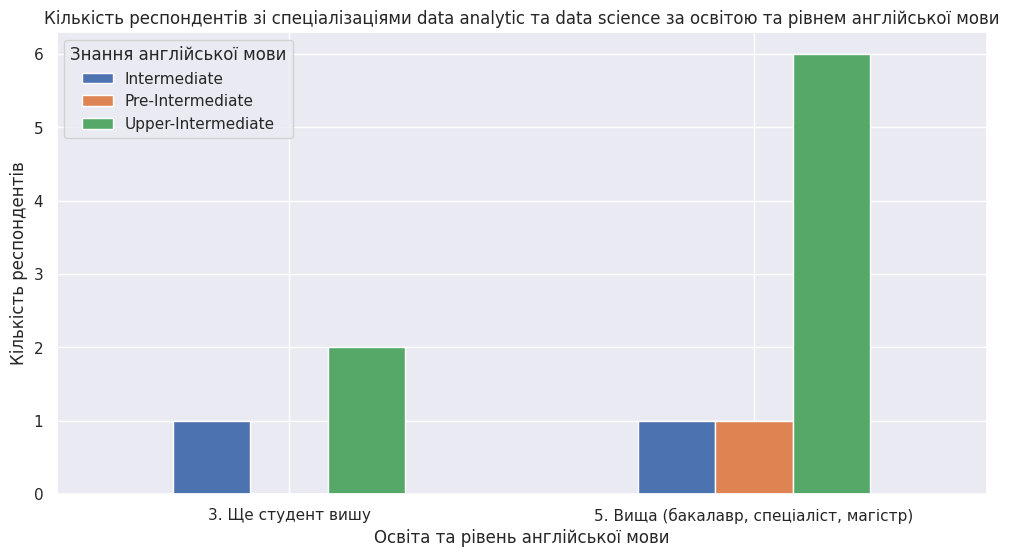

In [18]:
# В першу чергу проаналізуємо кількість респондентів зі спеціалізаціями data analytic та data science за освітою та рівнем англійської мови

# Відбір рядків зі значеннями 'data analytic' або 'data science' у стовпці 'Вкажіть вашу спеціалізацію'
df_filtered = survey[survey['Вкажіть вашу спеціалізацію'].isin(['Data Analyst', 'Data Scientist'])]

# Групування за стовпцями 'Яка у вас освіта?' та 'Знання англійської мови', та підрахунок кількості рядків у кожній групі
df_grouped = df_filtered.groupby(['Яка у вас освіта?', 'Знання англійської мови']).count()["Чи приділяєте час самонавчанню?"].unstack()

# Візуалізація результатів у вигляді стовпчикової діаграми
ax = df_grouped.plot(kind='bar', figsize=(12,6), rot=0)
ax.set_xlabel('Освіта та рівень англійської мови')
ax.set_ylabel('Кількість респондентів')
ax.set_title('Кількість респондентів зі спеціалізаціями data analytic та data science за освітою та рівнем англійської мови')
plt.show()


Перше на що хочеться звернути увагу це те, що відсуті групи "середня" та "середня спеціальна" освіта. Майже усі представники цих двох професій мають вищу освіту та рівень англійської upper-intermediate або intermediate. 

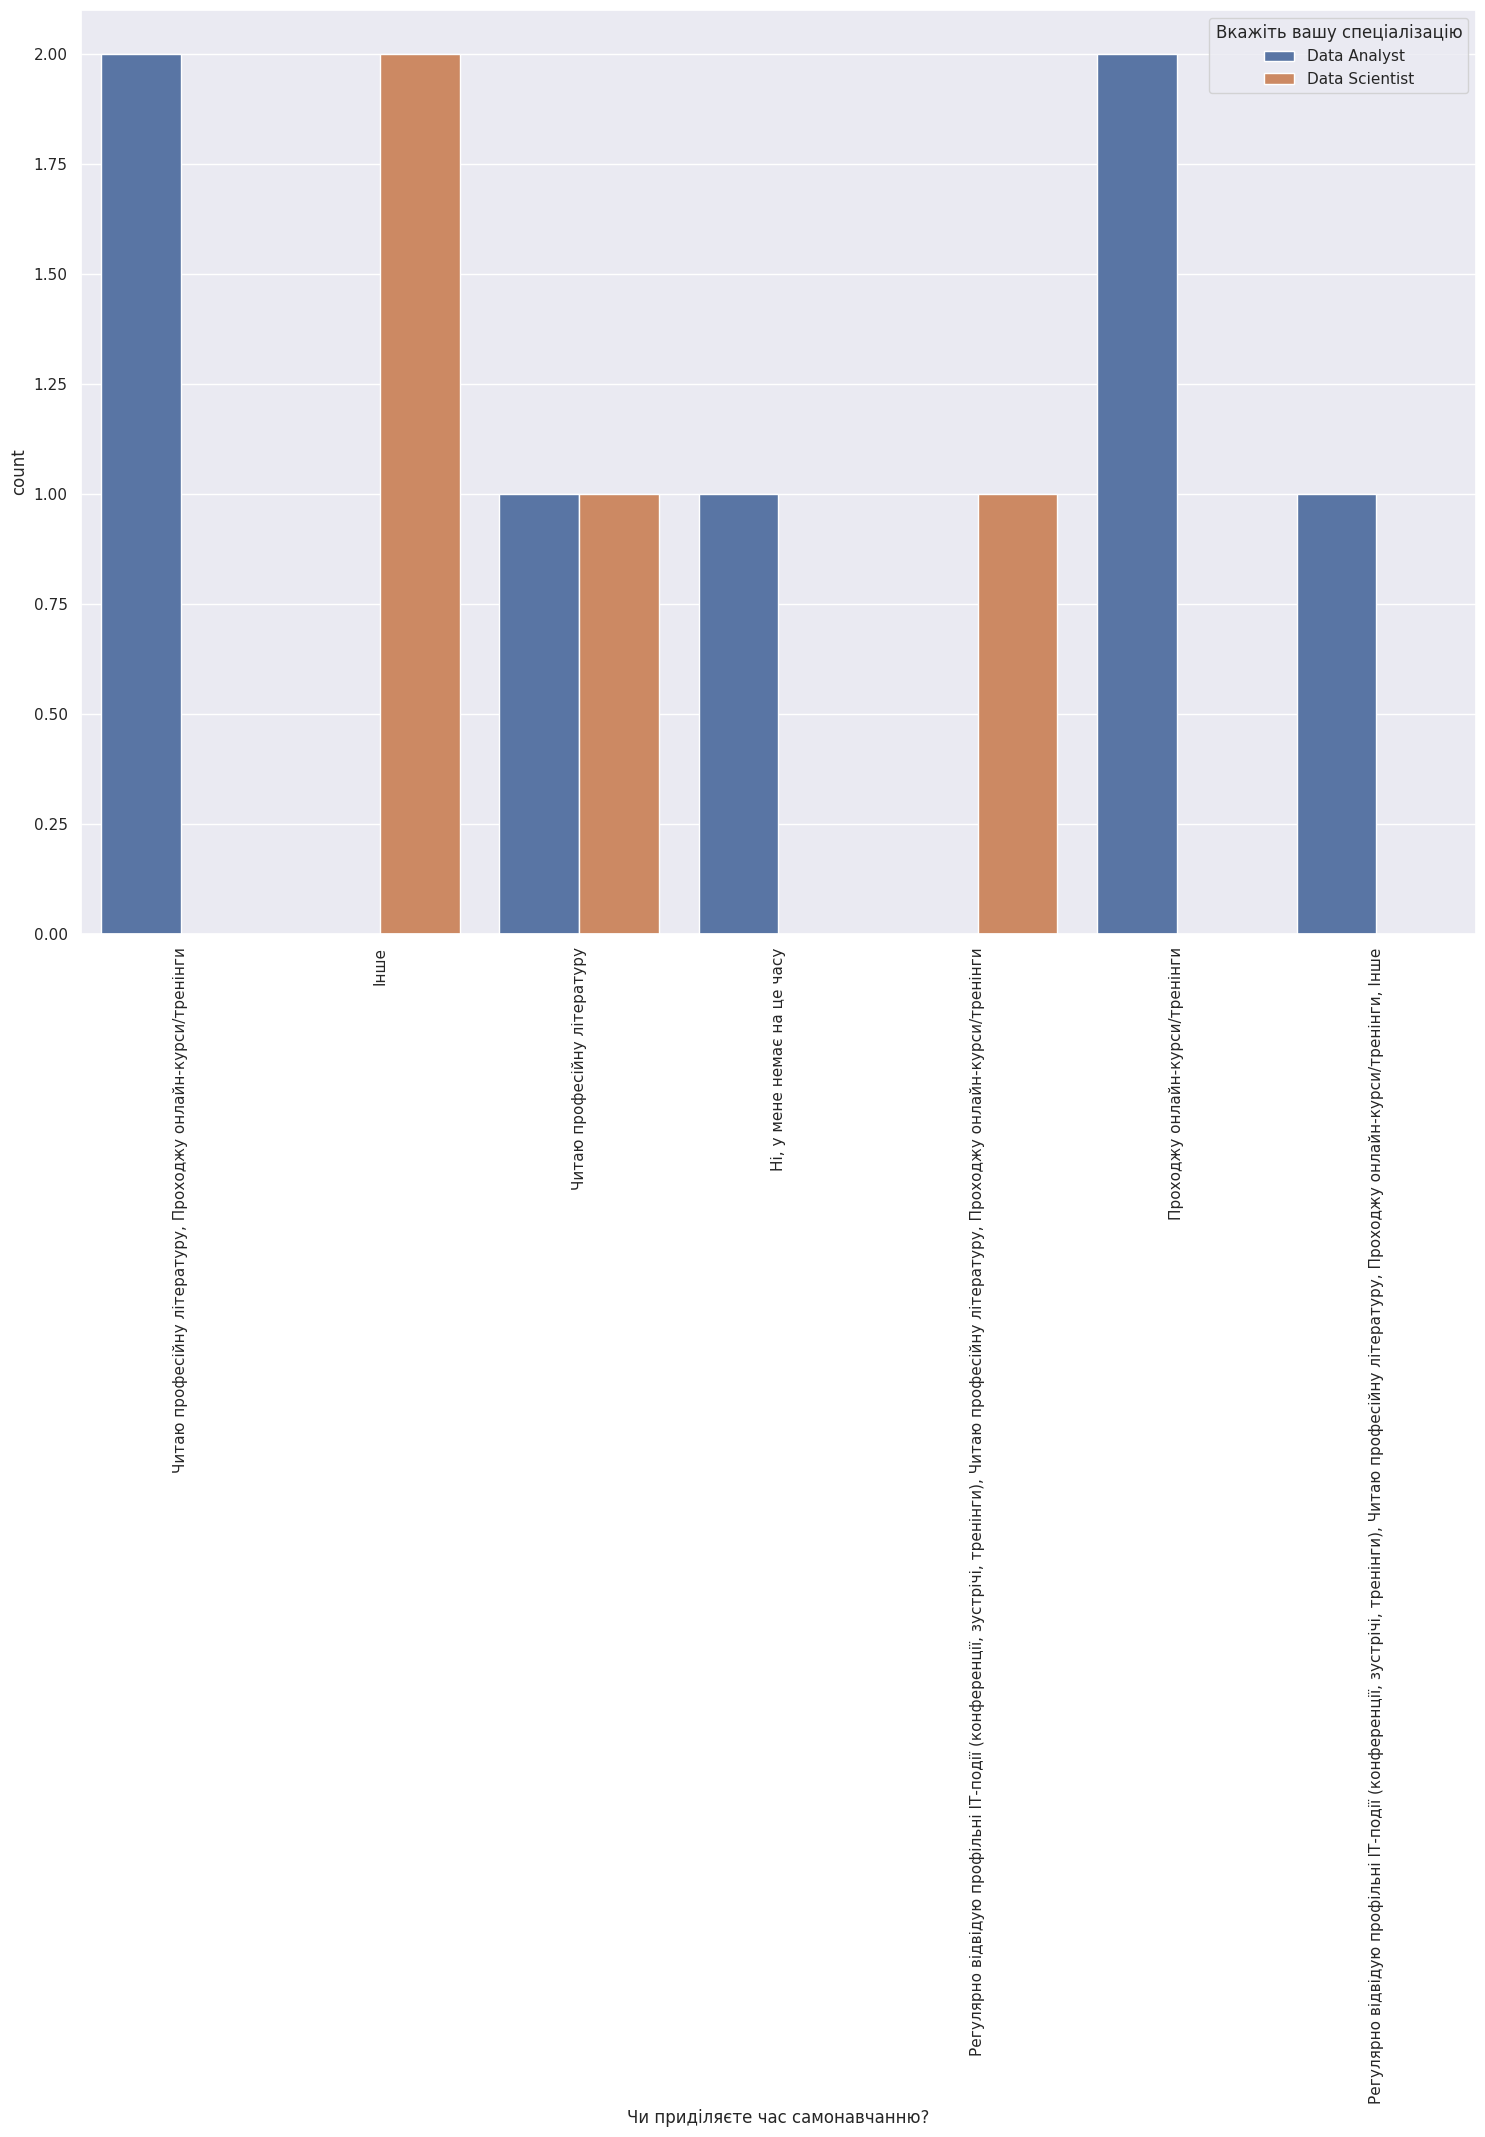

In [19]:
# Наступним хотілось би переглянути чи займаються вказані спеціальності самонавчанням:

# візуалізація
fig, ax = plt.subplots(figsize=(18, 12))
sns.countplot(x='Чи приділяєте час самонавчанню?', hue='Вкажіть вашу спеціалізацію', data=df_filtered)
plt.xticks(rotation=90)
plt.show()

Переважна кількість вказаних працівниких у вільний час займається проходженням онлайн-курсів або читає професійну літературу. Це свідчить про високий освітній рівень. 

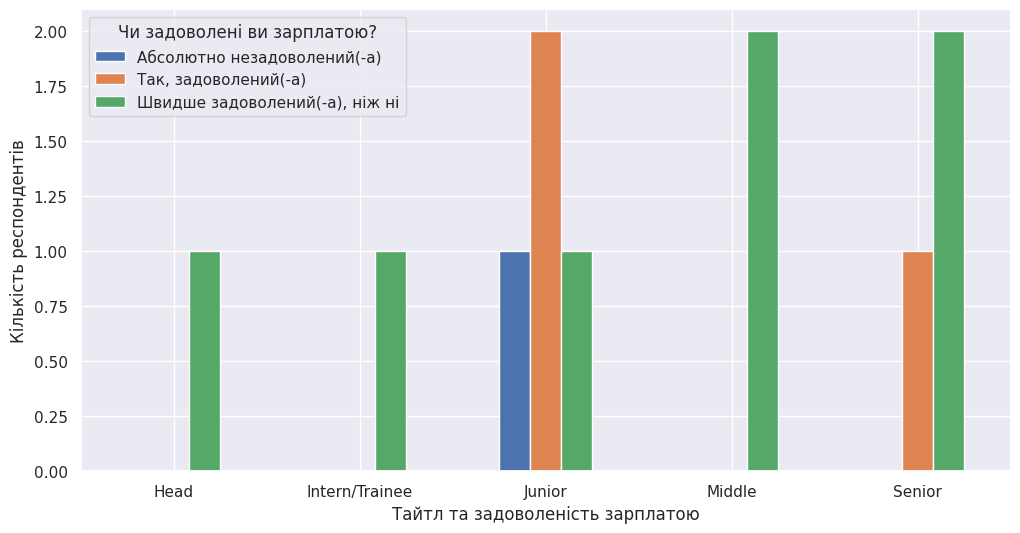

In [20]:
# Переглянемо які позиції, займають вказані професії у своїх командах та чи влаштовує їх їхня зарплата:

# Групування за стовпцями 'Ваш тайт' та 'Чи задоволені ви зарплатою', та підрахунок кількості рядків у кожній групі
df_grouped = df_filtered.groupby(['Ваш тайтл', 'Чи задоволені ви зарплатою?']).count()["Чи приділяєте час самонавчанню?"].unstack()

# Візуалізація результатів у вигляді стовпчикової діаграми
ax = df_grouped.plot(kind='bar', figsize=(12,6), rot=0)
ax.set_xlabel('Тайтл та задоволеність зарплатою')
ax.set_ylabel('Кількість респондентів')
plt.show()

Бачимо, що переважна кількість працівників на рівні Middle, що є непогано, однак і присутня досить значна частка Senior і тим більше Team Lead, що говорить про великий освітній рівень та навички цієї групи спеціалістів в середньому. Говорячи про задоволеність зарплати, то більшість каже - "так", а отже роботодавці гідно оцінюють працівників, що, знову ж, свідчить про їхній рівень.  

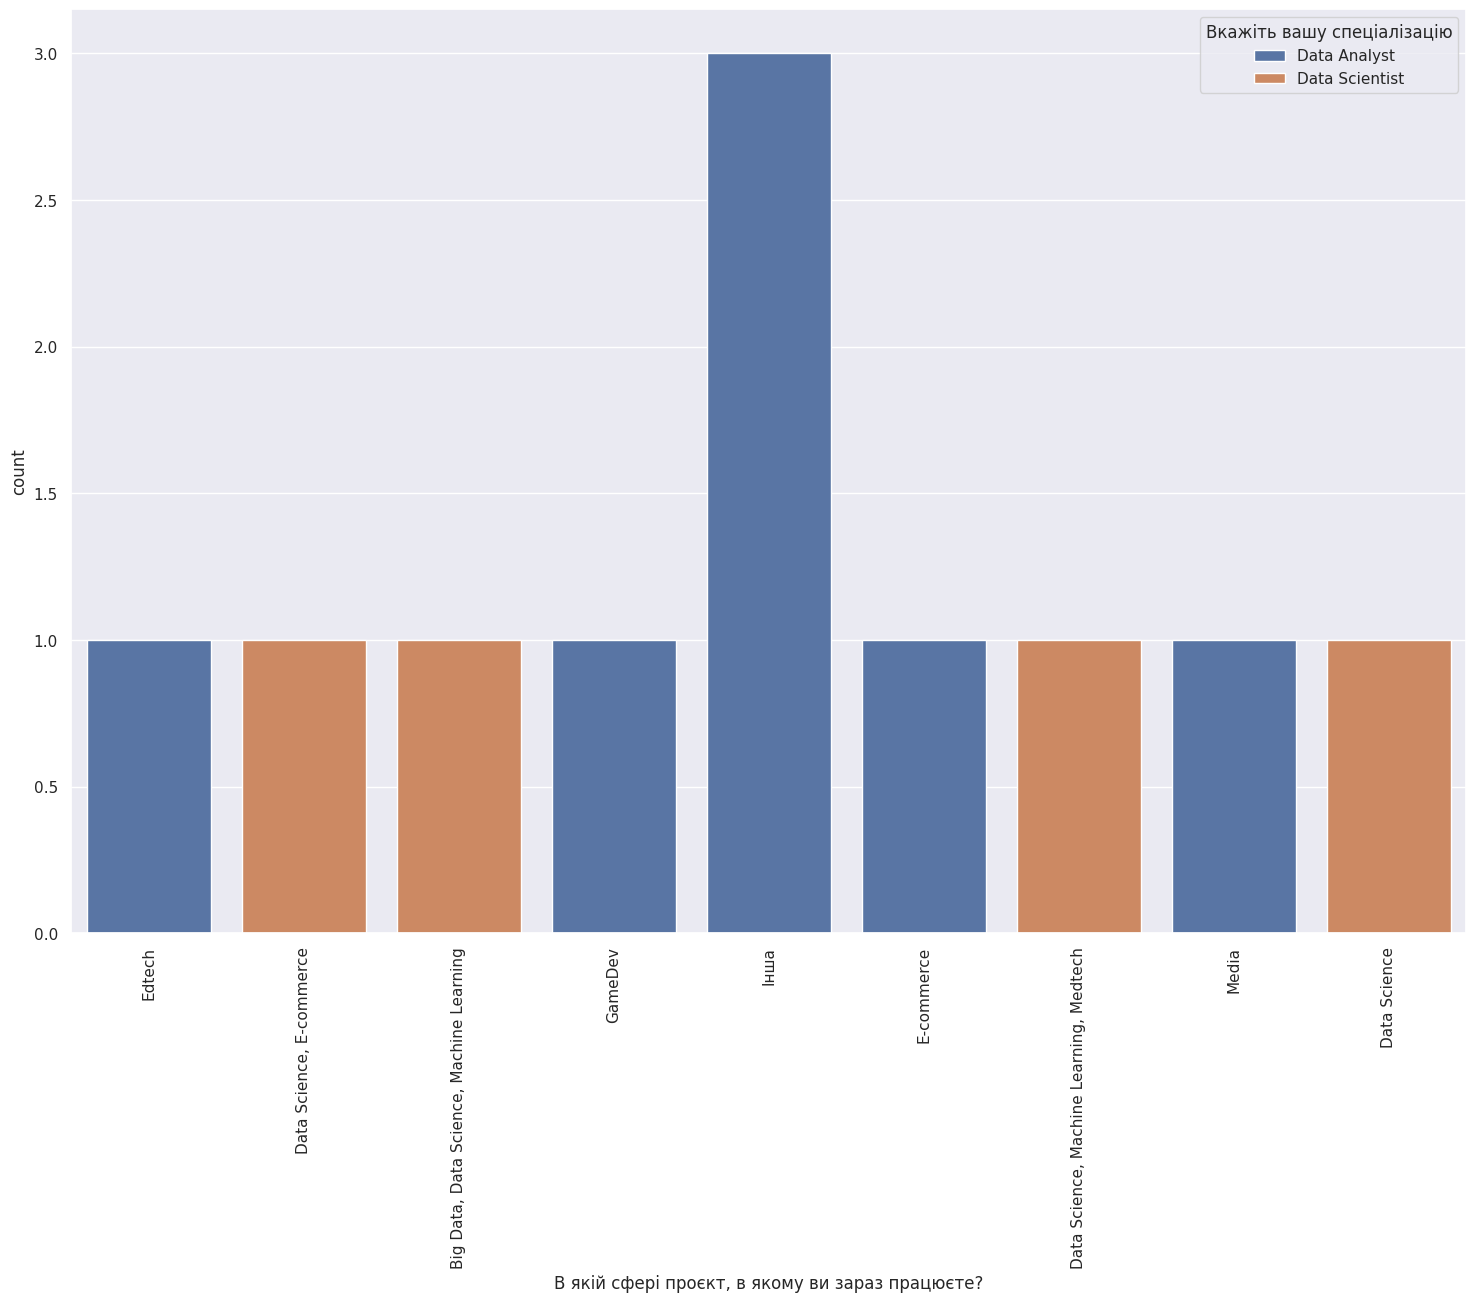

In [21]:
# Проаналізуємо в яких проектах найчастіше працюють наші спеціалісти:
# візуалізація
fig, ax = plt.subplots(figsize=(18, 12))
sns.countplot(x='В якій сфері проєкт, в якому ви зараз працюєте?', hue='Вкажіть вашу спеціалізацію', data=df_filtered)
plt.xticks(rotation=90)
plt.show()

Отож, Data Analyst найчастіше примає участь в E-commerce, Fintech, Gambling.Data Scientist - Machine Learning, Big Data та безпосередньо Data Scienсe. Ці сфери (та й інші), потребують значних знань, умінь та досвіду. Спираючись на усе вищесказане можна зробити висновок, що Data Analyst та Data Scientist мають високий освітній та професійний рівень.